In [ ]:
dataset = read_csv('C:/1/PyProj/StudyRegres/ENB2012_data.csv')
dataset=dataset.drop(columns=['Unnamed: 10', 'Unnamed: 11'])
dataset=dataset.dropna()   

In [1]:
from pandas import read_csv, DataFrame, Series
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score
#import pickle  #save&load models
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#startTime = datetime.now() 
#print("use time: ", datetime.now()  - startTime)
from  timeit import default_timer as timenow
import warnings
warnings.filterwarnings('ignore') #Ignore pandas warnings

In [34]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, LogisticRegression #кластеризация
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.svm import SVC

In [2]:
td_ts=read_csv('C:/Users/ao756/PyProj/TitanicKaggle/test.csv')

In [3]:
td=read_csv('C:/Users/ao756/PyProj/TitanicKaggle/train.csv')

In [4]:
td_res=read_csv('C:/Users/ao756/PyProj/TitanicKaggle/gender_submission.csv')

0

In [5]:
from graphviz  import Source
from IPython.display import SVG, display, HTML
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>" 

In [27]:
#
td.isnull().sum()
X.Sex[X.Sex=='male'].count() 
td[td.Parch==2].count()
X.isna().sum()
X.Embarked.unique()
td.head()   #shape
X_train.dtypes   #Series.str.isnumeric

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [19]:
processed_df['Age']# =td.copy()
name='Kent, Mr. Edward Austin'
td.loc[td['Name'] == name]['Survived'].values[0]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      NaN
18     31.0
19      NaN
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26      NaN
27     19.0
28      NaN
29      NaN
       ... 
861    21.0
862    48.0
863     NaN
864    24.0
865    42.0
866    27.0
867    31.0
868     NaN
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878     NaN
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
processed_df['Age'] = processed_df.groupby(['Pclass','Sex','Parch','SibSp'])['Age'].transform(lambda x: x.fillna(x.mean()))
processed_df['Age'] = processed_df.groupby(['Pclass','Sex','Parch'])['Age'].transform(lambda x: x.fillna(x.mean()))
processed_df['Age'] = processed_df.groupby(['Pclass','Sex'])['Age'].transform(lambda x: x.fillna(x.mean()))

In [18]:
processed_df.groupby(['Pclass','Sex','Parch','SibSp'])['Age'].transform(lambda x: x.fillna(x.mean()))

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
5      29.184492
6      54.000000
7       2.000000
8      27.000000
9      14.000000
10      4.000000
11     58.000000
12     20.000000
13     39.000000
14     14.000000
15     55.000000
16      2.000000
17     33.904762
18     31.000000
19     23.565789
20     35.000000
21     34.000000
22     15.000000
23     28.000000
24      8.000000
25     38.000000
26     29.184492
27     19.000000
28     23.565789
29     29.184492
         ...    
861    21.000000
862    48.000000
863          NaN
864    24.000000
865    42.000000
866    27.000000
867    31.000000
868    29.184492
869     4.000000
870    26.000000
871    47.000000
872    33.000000
873    47.000000
874    28.000000
875    15.000000
876    20.000000
877    19.000000
878    29.184492
879    56.000000
880    25.000000
881    33.000000
882    22.000000
883    28.000000
884    25.000000
885    39.000000
886    27.000000
887    19.000000
888          N

In [17]:
processed_df.groupby(['Pclass','Sex','Parch','SibSp']).count()    #['Age'].transform(lambda x: x.fillna(x.mean()))

PassengerId  Survived  Name  Age  Ticket  Fare  \
Pclass Sex    Parch SibSp                                                   
1      female 0     0               34        34    34   32      34    34   
                    1               29        29    29   23      29    29   
                    2                1         1     1    1       1     1   
              1     0               10        10    10    9      10    10   
                    1                7         7     7    7       7     7   
              2     0                5         5     5    5       5     5   
                    1                4         4     4    4       4     4   
                    2                2         2     2    2       2     2   
                    3                2         2     2    2       2     2   
       male   0     0               75        75    75   54      75    75   
                    1               22        22    22   22      22    22   
                    2                2         2     2    2       2     2   
              1     0                9         9     9    9       9     9   
                    1                5         5     5    5       5     5   
              2     0                4         4     4    4       4     4   
                    1                3         3     3    3       3     3   
                    3                1         1     1    1       1     1   
              4     1                1         1     1    1       1     1   
2      female 0     0               32        32    32   30      32    32   
                    1               12        12    12   12      12    12   
                    3                1         1     1    1       1     1   
              1     0                7         7     7    7       7     7   
                    1                9         9     9    9       9     9   
                    2                2         2     2    2       2     2   
              2     0                5         5     5    5       5     5   
                    1                6         6     6    6       6     6   
              3     1                1         1     1    1       1     1   
                    2                1         1     1    1       1     1   
       male   0     0               72        72    72   63      72    72   
                    1               14        14    14   14      14    14   
...                                ...       ...   ...  ...     ...   ...   
3      female 2     0               10        10    10    7      10    10   
                    1                1         1     1    0       1     1   
                    2                2         2     2    2       2     2   
                    3                2         2     2    2       2     2   
                    4                6         6     6    6       6     6   
                    5                1         1     1    1       1     1   
                    8                3         3     3    0       3     3   
              3     0                1         1     1    1       1     1   
                    1                1         1     1    1       1     1   
              4     0                1         1     1    1       1     1   
                    1                1         1     1    1       1     1   
              5     0                2         2     2    2       2     2   
                    1                2         2     2    2       2     2   
              6     1                1         1     1    1       1     1   
       male   0     0              264       264   264  187     264   264   
                    1               24        24    24   17      24    24   
                    2                8         8     8    6       8     8   
              1     0                4         4     4    4       4     4   
                    1               15        15    15   13      15    15   
                    3  

In [ ]:
#### поехали

In [6]:
#X=td.drop(['Cabin'], axis=1) # не акктуально
#X = td.drop(['PassengerId','Survived','Name', 'Ticket', 'Cabin'], axis=1)
#Y = td.Survived

In [38]:
X=td.copy()
X.Sex[X.Sex=='male']=1
X.Sex[X.Sex=='female']=0

In [39]:
X['Embarked'] = X['Embarked'].map({'S': 1, 'C': 2,'Q':3}) 

In [40]:
#X = X.fillna({'Age': X.Age.median()})  #заполнение пустых значений  #следующая лучше

In [41]:
processed_df=X
processed_df['Age'] = processed_df.groupby(['Pclass','Sex','Parch','SibSp'])['Age'].transform(lambda x: x.fillna(x.mean()))
processed_df['Age'] = processed_df.groupby(['Pclass','Sex','Parch'])['Age'].transform(lambda x: x.fillna(x.mean()))
processed_df['Age'] = processed_df.groupby(['Pclass','Sex'])['Age'].transform(lambda x: x.fillna(x.mean()))

In [45]:
processed_df.isna().sum()
#processed_df['Age'].interpolate().isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [43]:
processed_df['Cabin'].fillna('U', inplace=True)
processed_df['Cabin'] = processed_df['Cabin'].str[:1]
#Кодирование числом - гениально, мап кодирует букву цифрой через enumerate (Множетво из списка первых букв кабины возвращает уникальные значения.)
processed_df['Cabin'] = processed_df['Cabin'].map({cabin: p for p, cabin in enumerate(set(cab for cab in processed_df['Cabin']))})
processed_df['Fare'] = processed_df['Fare'].interpolate()

In [44]:
processed_df['Embarked'].fillna(2, inplace=True)  #На второй есть дорогие каюты

In [44]:
X=X.dropna()

In [46]:
Y = X.Survived
X = X.drop(['PassengerId','Survived','Name', 'Ticket', ], axis=1)

In [47]:
print(X.shape,Y.shape)
X.describe()

(891, 8) (891,)


Pclass         Age       SibSp       Parch        Fare       Cabin  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     2.308642   29.532353    0.523008    0.381594   32.204208    0.891134   
std      0.836071   13.521859    1.102743    0.806057   49.693429    1.855584   
min      1.000000    0.420000    0.000000    0.000000    0.000000    0.000000   
25%      2.000000   21.500000    0.000000    0.000000    7.910400    0.000000   
50%      3.000000   29.184492    0.000000    0.000000   14.454200    0.000000   
75%      3.000000   36.000000    1.000000    0.000000   31.000000    0.000000   
max      3.000000   80.000000    8.000000    6.000000  512.329200    8.000000   

         Embarked  
count  891.000000  
mean     1.363636  
std      0.636159  
min      1.000000  
25%      1.000000  
50%      1.000000  
75%      2.000000  
max      3.000000

Pclass         Age       SibSp       Parch        Fare       Cabin  \
count  889.000000  889.000000  889.000000  889.000000  889.000000  889.000000   
mean     2.311586   29.486307    0.524184    0.382452   32.096681    1.692913   
std      0.834700   13.490089    1.103705    0.806761   49.697504    1.796883   
min      1.000000    0.420000    0.000000    0.000000    0.000000    0.000000   
25%      2.000000   21.000000    0.000000    0.000000    7.895800    1.000000   
50%      3.000000   29.184492    0.000000    0.000000   14.454200    1.000000   
75%      3.000000   36.000000    1.000000    0.000000   31.000000    1.000000   
max      3.000000   80.000000    8.000000    6.000000  512.329200    8.000000   

         Embarked  
count  889.000000  
mean     1.362205  
std      0.636157  
min      1.000000  
25%      1.000000  
50%      1.000000  
75%      2.000000  
max      3.000000

In [48]:
  # Create a Family Size, Is Alone, Child and Mother columns
processed_df['FamillySize'] = processed_df['SibSp'] + processed_df['Parch'] + 1
processed_df['FamillySize'][processed_df['FamillySize'].between(1, 5, inclusive=False)] = 2
processed_df['FamillySize'][processed_df['FamillySize']>5] = 3
processed_df['IsAlone'] = np.where(processed_df['FamillySize']!=1, 0, 1)
processed_df['IsChild'] = processed_df['Age'] < 18
processed_df['IsChild'] = processed_df['IsChild'].astype(int)

In [ ]:
## закончили

In [111]:
k=DataFrame()
k['Cabin'] = td['Cabin'].str[:1]
cabin_dict={cabin: p for p, cabin in enumerate(set(cab for cab in k['Cabin']))}
k['Cabin'] = k['Cabin'].map(cabin_dict)
#decoder_dict   {p: cabin for cabin, p in cabin_dict.items()}
#k['Cabin'].map({p: cabin for cabin, p in cabin_dict.items()})==td['Cabin'].str[:1]

In [ ]:
#альтернативное Кодирвоание
df.loc[df['Type']=='ab', 'Price'] /= 1000
w['female'] = w['female'].map({'female': 1, 'male': 0}) 
w.female.replace(to_replace=dict(female=1, male=0), inplace=True) 

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
for k in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[k].values)) 
    all_data[k] = lbl.transform(list(all_data[k].values))
# shape        
print('Shape all_data: {}'.format(all_data.shape))

In [ ]:
#кодирование переменных#X = pd.get_dummies(X)   #https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [ ]:
df['Item_Weight'] = df['Item_Weight'].fillna((df['Item_Weight'].mean()))
#Если вы хотите заполнить нулевое значение какой-либо строкой, используйте
#Outlet_size это имя столбца
df.Outlet_Size = df.Outlet_Size.fillna('Missing')


In [ ]:
#DbSCAN запускаем

In [49]:
#Проекция на две оси
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X)
X1 = pca.transform(X)  

Estimated number of clusters: 50
Estimated number of noise points: 74
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: -0.086


Text(0.5, 1.0, 'Estimated number of clusters: 50')

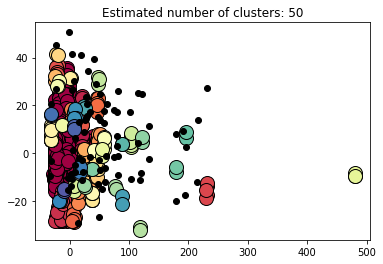

In [80]:
#from sklearn.cluster import DBSCAN
#X1=X.copy()
#######   ЦЕНТРИрование или нормализация
#from sklearn.preprocessing import StandardScaler
#X1 = StandardScaler().fit_transform(X)  # при центрировании расстояние меняется и дифференциация классов тоже
#####
#from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X)
X1 = pca.transform(X)
####
clustering = DBSCAN(eps=3, min_samples=2, #n_jobs=-1 #- используемы процессоры #defaul=None Один
                   ).fit(X1)
db=clustering
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels=clustering.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#####  metrics
#from sklearn import metrics
labels_true=labels
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

######ОТрисовывае
import matplotlib.pyplot as plt
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)  #отдельная маска под каждый класс

    xy = X1[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X1[class_member_mask & ~core_samples_mask]   
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
#core_samples_mask - маска не шума, с отрицание ~будет шум
#class_member_mask- маска для опред класса
#а можно брать маску по всем классам (labels == k)
plt.title('Estimated number of clusters: %d' % n_clusters_)

In [ ]:
plt.show

Text(0.5, 0.92, 'Estimated number of clusters: 62')

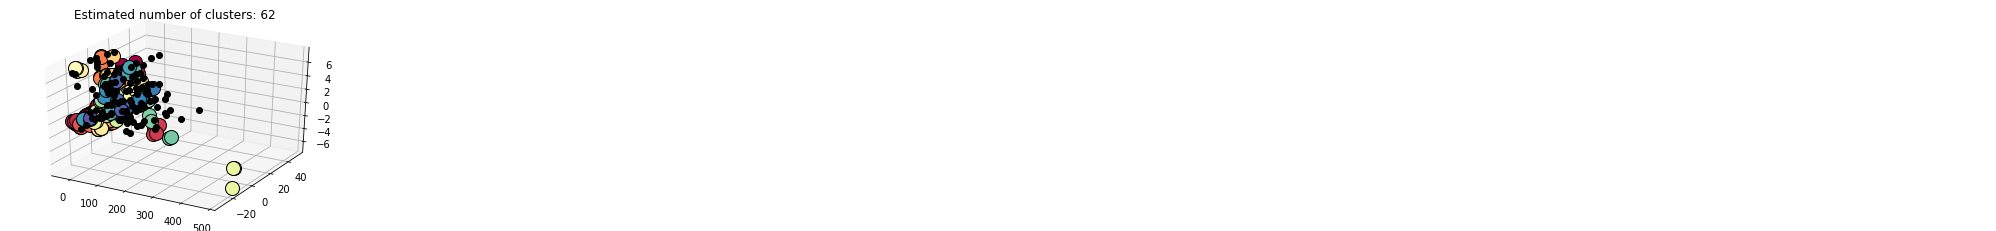

In [78]:
#отрисовываем в 3д
import matplotlib.pyplot as plt   #рисует 3D
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

from mpl_toolkits import mplot3d #3D Отрисовка
ax = plt.axes(projection="3d")
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)  #отдельная маска под каждый класс

    xy = X1[class_member_mask & core_samples_mask]
    ax.plot3D(xy[:, 0], xy[:, 1],xy[:, 2], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14,) # projection='3d')
    xy = X1[class_member_mask & ~core_samples_mask]   
    ax.plot3D(xy[:, 0], xy[:, 1],xy[:, 2], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
plt.title('Estimated number of clusters: %d' % n_clusters_)
#plt.show()
#Axes3D.plot()

In [ ]:
#Модели

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier

In [48]:
dt=DecisionTreeClassifier(criterion='entropy', max_depth=5)
rf=RandomForestClassifier(max_depth=5)

In [49]:
X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, test_size=0.25, random_state=0)
#clf.fit(X_train, y_train)
dt.fit(X_train, Y_train)
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#Массовое обучение 


In [185]:
#
models =[]
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('BNB', BernoulliNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GBM', AdaBoostClassifier()))
models.append(('NN', MLPClassifier()))
models.append(('SVM', SVC()))

NameError: name 'LinearDiscriminantAnalysis' is not defined

In [183]:
#delete после апдейта HP
#   Регрессии   не используются здесь  
models = [#LinearRegression(), # метод наименьших квадратов
      RandomForestRegressor(n_estimators=100, max_features ='sqrt'), # случайный лес
    KNeighborsRegressor(n_neighbors=6), # метод ближайших соседей
        SVR(kernel='linear'), # метод опорных векторов с линейным ядром
       ]

In [188]:
#классификаторы
models = [DecisionTreeClassifier(), # метод наименьших квадратов
      RandomForestClassifier(n_estimators=100, max_features ='sqrt'), # случайный лес
    KNeighborsClassifier(n_neighbors=6), # метод ближайших соседей
        SVC(kernel='linear'), # метод опорных векторов с линейным ядром
       # LogisticRegression() #классификатор # логистическая регрессия медленная, точность на уровне
       ]

In [189]:
#создаем временные структуры
TestModels = DataFrame()
tmp = {}
#Xtrn, Ytrn,Xtest,Ytest=X_train, Y_train,X_test, Y_test
Xtrn, Ytrn,Xtest,Ytest=X_train, Y_train.to_frame(),X_test, Y_test.to_frame()
#для каждой модели из списка
for model in models:
    #получаем имя модели
    m = str(model)
    tmp['Model'] = m[:m.index('(')]    #берет строку названия модели до первого вхождения символа '('   
    #для каждого столбцам результирующего набора
    startTime = timenow()
    print(m[:m.index('(')] )
    for i in  range(Ytrn.shape[1]):   #размерность
        #обучаем модель
        #model.fit(Xtrn.values, Ytrn[:,i])      # Ytrn[:,i] берет один из двух столбцов   Ytrn[Ytrn.columns[0:1]]
        #model.fit(Xtrn, Ytrn[Ytrn.columns[0:i]].values)      # Ytrn[:,i] берет один из двух столбцов   Ytrn[Ytrn.columns[0:1]]
        model.fit(Xtrn, Ytrn.iloc[:,i:i+1].values  )      # Ytrn[:,i] берет один из двух столбцов   Ytrn[Ytrn.columns[0:1]]
        #вычисляем коэффициент детерминации - R2_score
        #tmp['R2_Y%s'%str(i+1)] = r2_score(Ytest[:,0], model.predict(Xtest))
        prediction=model.predict(Xtest.values)
        tmp['R2_Y%s'%str(i+1)] = r2_score(Ytest.iloc[:,i:i+1].values, model.predict(Xtest.values))
        #tmp['R2_Y%s'%str(i+1)] = model.score(Ytest.iloc[:,i:i+1].values, model.predict(Xtest.values))
        tmp['Precision%s'%str(i+1)]=precision_score(Ytest.iloc[:,0].values, model.predict(Xtest.values),average='micro')
        tmp['Recal%s'%str(i+1)]=precision_score(Ytest.iloc[:,0].values, model.predict(Xtest.values),average='macro')
        tmp['CrossV%s'%str(i+1)]=cross_val_score(model, X_test, Y_test , cv=3).mean()
    print('Время обучения ',startTime-timenow())
    #записываем данные и итоговый DataFrame
    TestModels = TestModels.append([tmp])
#делаем индекс по названию модели
TestModels.set_index('Model', inplace=True)

#запихнуть время на обучение, параметр оценки

DecisionTreeClassifier
RandomForestClassifier


C:\Users\ao756\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


KNeighborsClassifier
SVC


C:\Users\ao756\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\ao756\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression


C:\Users\ao756\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ao756\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


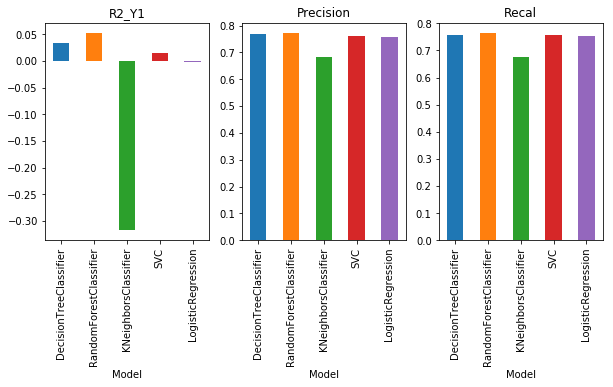

In [195]:
fig, axes = plt.subplots(ncols=3, figsize=(10,4))
TestModels.R2_Y1.plot(ax=axes[0], kind='bar', title='R2_Y1')
TestModels.Precision.plot(ax=axes[1], kind='bar', title='Precision')
TestModels.Recal.plot(ax=axes[2], kind='bar', title='Recal')

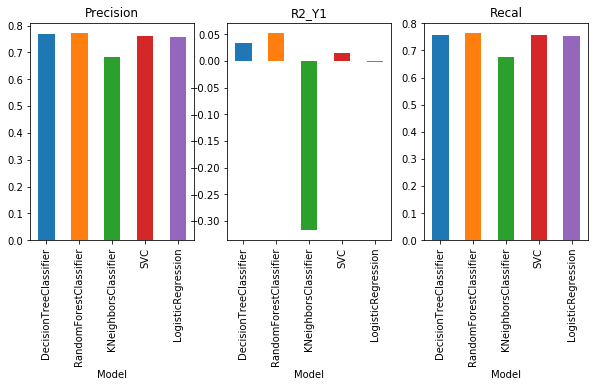

In [200]:
fig, axes = plt.subplots(ncols=len(TestModels), figsize=(10,4))
for i,k in enumerate(list(TestModels)):
    TestModels[k].plot(ax=axes[i], kind='bar', title=k)

In [ ]:
#мусор

In [190]:
#print(TestModels.loc[:,0].values)
#TestModels.iloc[:,0] - с индексом #.values
#TestModels.iloc[:,0].values # без индекса ,
list(TestModels

['Precision', 'R2_Y1', 'Recal']

In [50]:
from sklearn.metrics import precision_score
precision_score(Ytest.iloc[:,0].values, model.predict(Xtest.values),average='micro')
precision_score(Ytest.iloc[:,0].values, model.predict(Xtest.values),average='macro')

NameError: name 'Ytest' is not defined

In [20]:
r2_score(Y_train, dt.predict(X_train))

0.39707029557077234

In [198]:
dt.score(X, Y)

0.8796400449943758

In [252]:
cross_val_score(clf, X_train, Y_train , cv=5).mean()

0.8153936401383376

In [ ]:
#СтроимДерево

In [17]:
clf=rf
estimator = clf.estimators_[5]

In [19]:
# Export as dot file
from sklearn.tree import export_graphviz
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = list(X), #rf.feature_names,
                class_names = ['Negative','Positive'], #iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)


In [21]:
#подгружаем graphviz
import os   #https://graphviz.gitlab.io/_pages/Download/Download_windows.html ﻿
os.environ["PATH"] += os.pathsep + 'C:\\Users\\ao756\\Anaconda3\\bin' #C:\Users\ao756\Anaconda3\bin

In [25]:
#convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree2.png', '-Gdpi=120'])
#https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c

0

In [27]:
# Display in jupyter notebook  #visualization
from IPython.display import Image
Image(filename = 'tree.png')

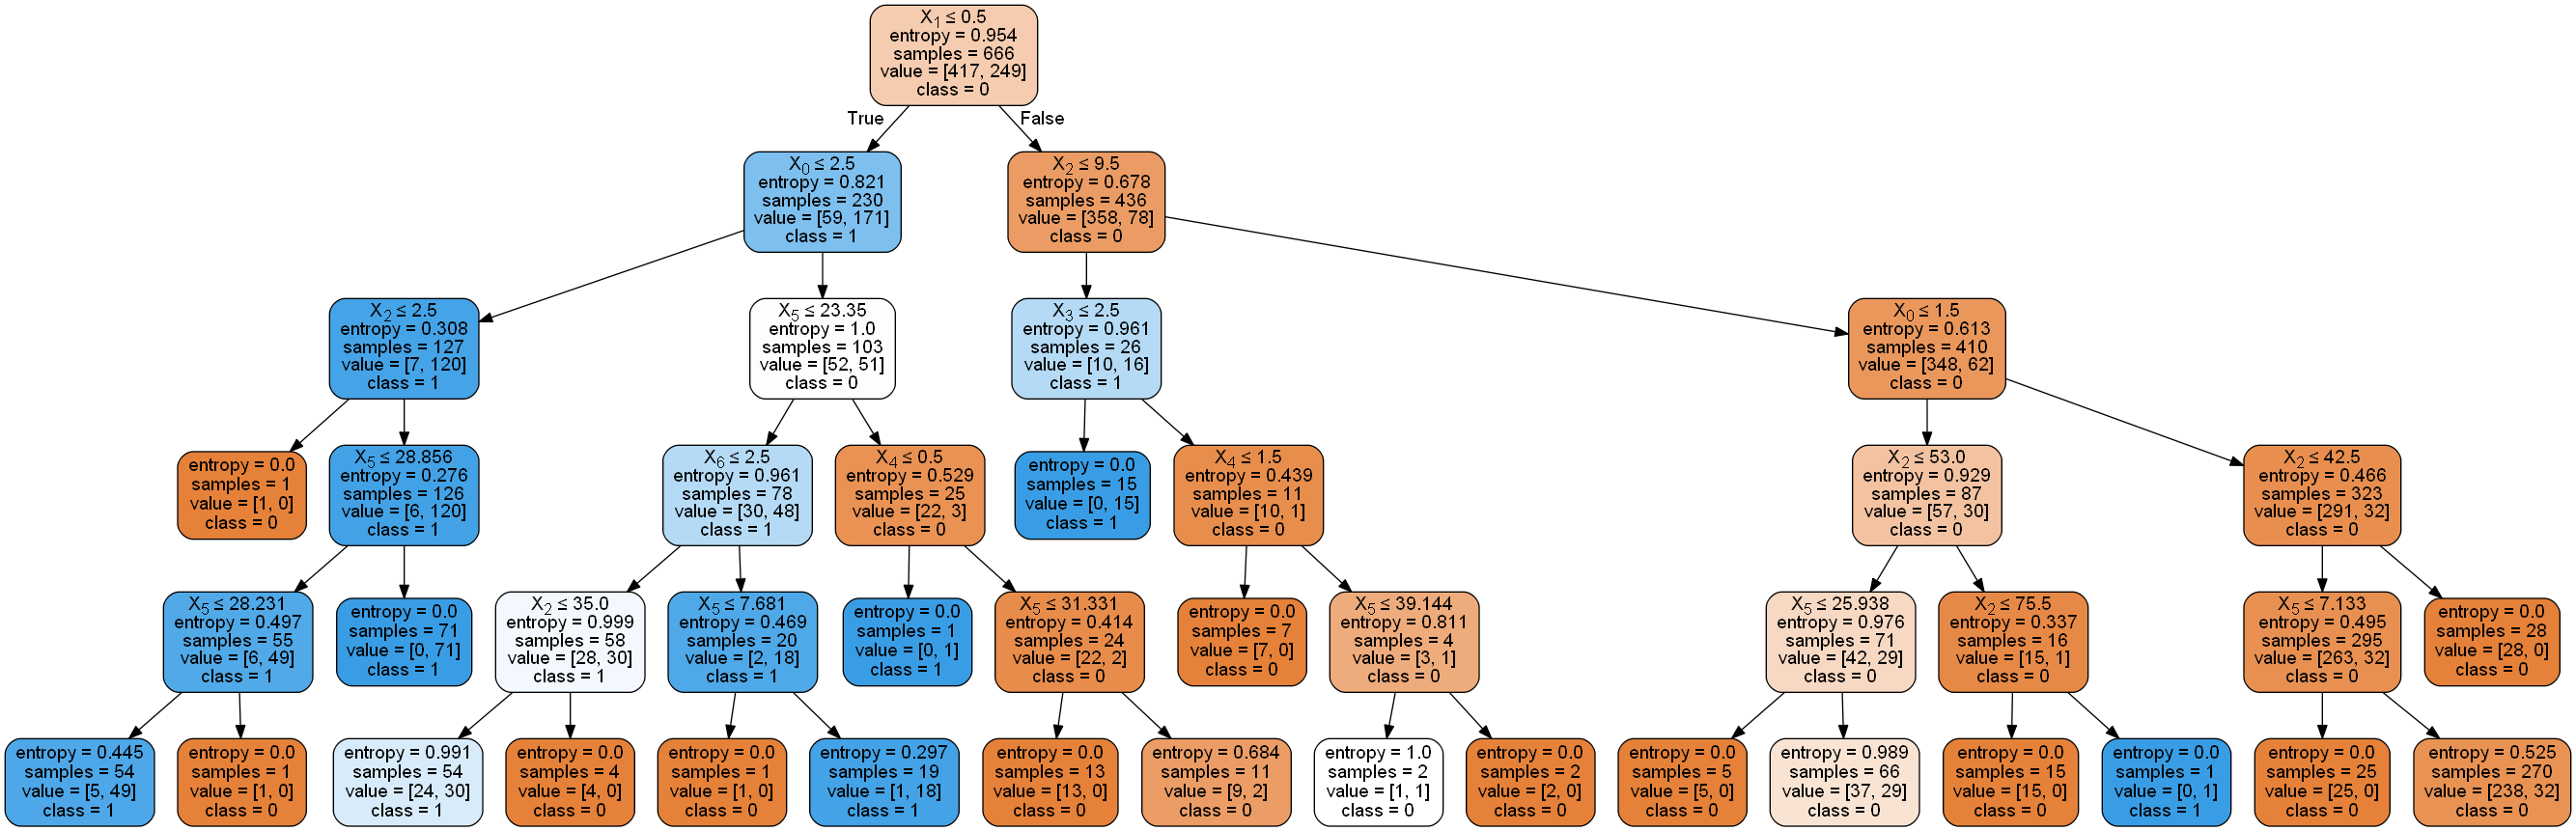

In [66]:
#Альтернативный graphviz
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, #feature_names = feature_cols,
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [ ]:
#Roc_Auc

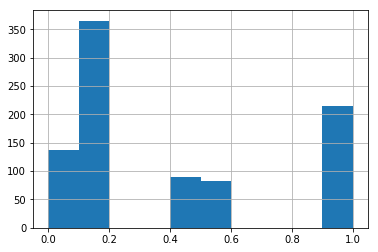

In [119]:
Series(pr_prob[:,1]).hist()

In [118]:
pr_prob=dt.predict_proba(X)

In [106]:
pr_prob2=np.where(pr_prob[:,0]>0.8,1,0)  
y_predicted_prob=Series(pr_prob2)

In [76]:
y_predicted_prob=Series(pr_prob[:,1])   #yt pfhf,jnfkj
Y_test1=Series(Y)

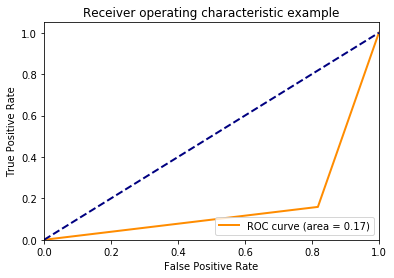

In [107]:
#Roc_Auc
from sklearn.metrics import roc_curve, auc
lw=2
fpr, tpr, thresholds = roc_curve(Y_test1, y_predicted_prob)
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#confusion matrix

In [ ]:
При классификации модель может допускать ошибки, присваивая наблюдению неверный класс. 
Существуют различные метрики оценки качества предсказаний, которые базируются н а 
4-ёх параметрах - true positive, false positive, false negative и true negative, 
соответствующих тому какой класс был присвоен наблюдениям каждого из классов. 
Матрицу из 4-ёх (в случае бинарной классификации) этих параметров называют confusion matrix.
the count of true negatives is 00 , false negatives is 10, true positives is 01 and false positives is 11.

In [109]:
predictions=clf.predict(X)
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(Y,predictions)
conf_matrix   #conf_matrix[1,0]=95

array([[502,  47],
       [ 95, 245]], dtype=int64)

In [62]:
import seaborn as sns    
print(accuracy_score(Y_test, dt.predict(X_test)))
sns.heatmap(conf_matrix, annot=True,annot_kws={"size": 16}, cmap="Blues")


NameError: name 'conf_matrix' is not defined

In [ ]:
#feature_importances

In [1]:
X_train.corr() 

NameError: name 'X_train' is not defined

In [59]:
X_train.corr()   #sex - бинарные признаки игнорирует
X.head()
#list(X_train)

Pclass Sex   Age  SibSp  Parch     Fare  Cabin  Embarked
0       3   1  22.0      1      0   7.2500      1       1.0
1       1   0  38.0      1      0  71.2833      5       2.0
2       3   0  26.0      0      0   7.9250      1       1.0
3       1   0  35.0      1      0  53.1000      5       1.0
4       3   1  35.0      0      0   8.0500      1       1.0

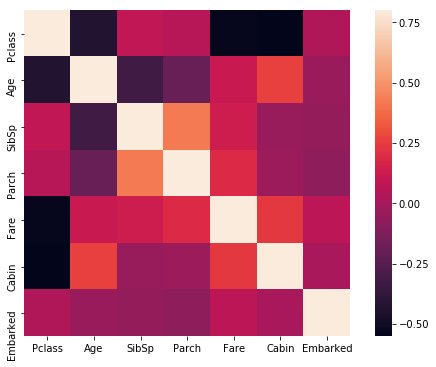

In [63]:
#correlation matrix & heatmap
corrmat = X_train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corrmat, vmax=.8, square=True);

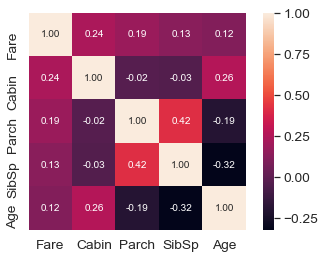

In [64]:
#saleprice correlation matrix
k = 5 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Fare')['Fare'].index
cm = np.corrcoef(X_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [68]:
list(X_train)

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']

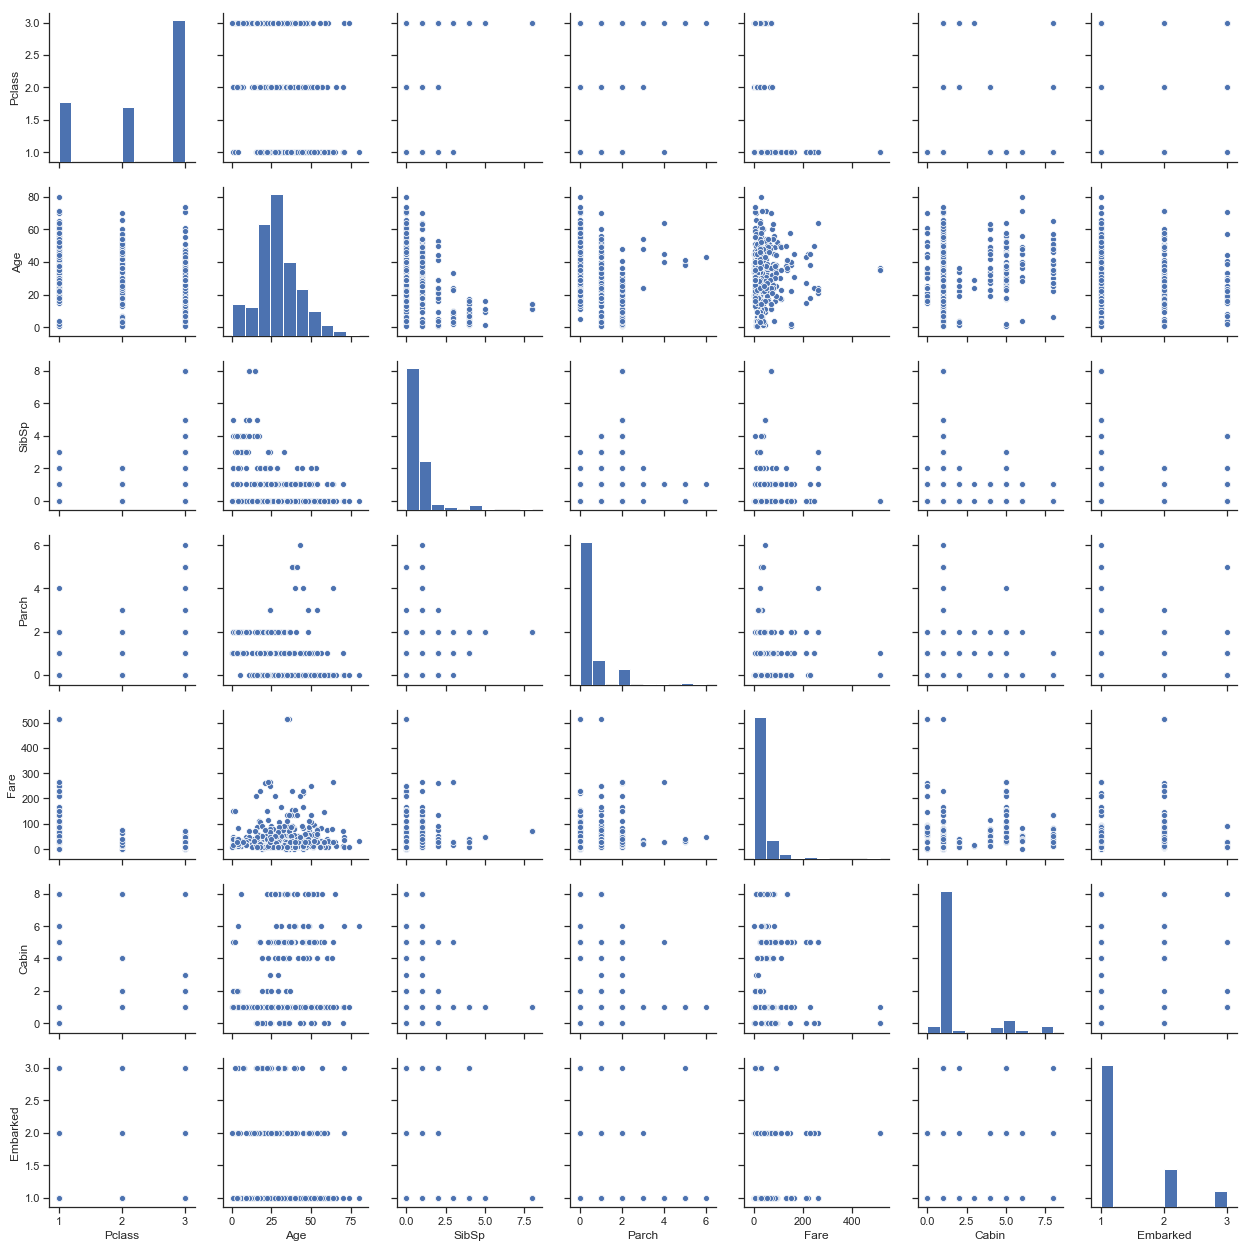

In [95]:
#scatterplot  # Попарные графики всего набора
sns.set()
sns.set(style="ticks", color_codes=True)
cols=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']
#cols = list(X_train).remove('Sex') #['Fare', 'SibSp', 'Age', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
#cols = ['Fare', 'SibSp', 'Age', ] #'Parch', 'Cabin', 'Embarked', 'Sex']
g=sns.pairplot(X_train[cols ], height = 2.5 ) #size = 2.5)
#plt.show();

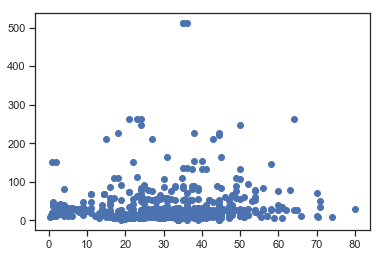

In [97]:
plt.scatter(X_train['Age'], X_train['Fare']);   #check homoscedasticity

#convert categorical variable into dummy
#df_train = pd.get_dummies(df_train)   хреново так делать

In [261]:
#model=clf.best_estimator_
model2=rf
feature_importances_pd=DataFrame({ "feature": list(X_train),
              "feature_importances": model2.feature_importances_   
            })
feature_importances_pd.sort_values('feature_importances')

feature  feature_importances
4     Parch             0.031810
6  Embarked             0.039723
3     SibSp             0.046173
0    Pclass             0.114215
2       Age             0.139331
5      Fare             0.252994
1       Sex             0.375754

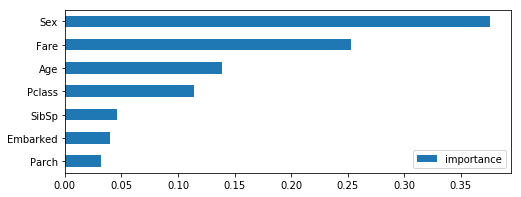

In [257]:
imp = DataFrame(model2.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(8, 3))  #,axis=1)

In [ ]:
ft.feature_importances_   #td.columns
features = fit.transform(X)
fit.n_features_ - количество предикторов

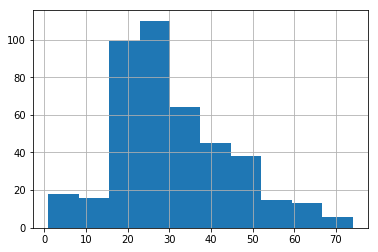

In [251]:
td[td.Survived==0].Age.hist()

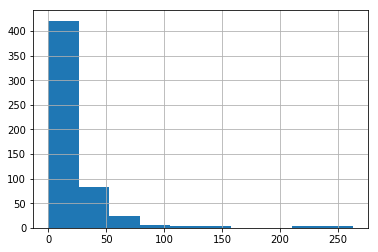

In [224]:
td[td.Survived==0].Fare.hist()

C:\Users\ao756\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


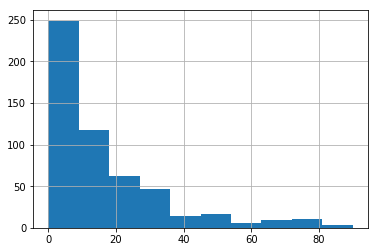

In [231]:
td[td.Fare<100][td.Survived==0].Fare.hist() #.count() #.hist()

In [39]:
T=td.copy()

In [38]:
X[X.Parch<1][X.SibSp<1].count()    #676безДетейМужа/233   M   606БезРодственников/210  M      #535/163/гибель373

C:\Users\ao756\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Pclass      535
Sex         535
Age         535
SibSp       535
Parch       535
Fare        535
Embarked    535
dtype: int64

In [ ]:
Одиноких ж выжило 99 из 126
64  из 411

СОвсем не одинокие
19 7
14 1

выжило %
74.2 ж от ж   26 от всех 
18.8 М  от М  12.2% от всех

Доля мужчин 64.7%

In [63]:
T[T.Sex=='male'].count()[0] /T.count()[0]

0.6475869809203143

In [ ]:
T[T.Sex=='female'].count()[0] /T[T.Sex=='female'].count()[0]

In [55]:
T[T.Parch>1][T.SibSp>1][T.Sex=='male'][T.Survived==1].count() 

C:\Users\ao756\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


PassengerId    1
Survived       1
Pclass         1
Name           1
Sex            1
Age            1
SibSp          1
Parch          1
Ticket         1
Fare           1
Cabin          0
Embarked       1
dtype: int64

In [18]:
# don't usability
#import sklearn
#graph = Source(sklearn.tree.export_graphviz(clf, out_file=None,
from sklearn.tree import export_graphviz
graph = Source(export_graphviz(clf, out_file=None,
                                   #feature_names=list(X),
                                   class_names=['Negative','Positive'],
                                   filled = True))
display(SVG(graph.pipe(format='svg')))

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH